In [27]:
import cv2
import numpy as np

# Загрузка изображения (бинарное изображение)
image = cv2.imread('etc/1.jpg', cv2.IMREAD_GRAYSCALE)

# Применение порогового значения для бинаризации изображения
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Поиск связных компонент
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

# Вывод количества связных компонент
print("Количество связных компонент:", num_labels - 1)  # Вычитаем 1, так как 0 - это фон

# Отображение изображения с метками связных компонент
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_image = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_image = cv2.cvtColor(labeled_image, cv2.COLOR_HSV2BGR)
labeled_image[label_hue == 0] = 0

cv2.imshow('Связные компоненты', labeled_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Количество связных компонент: 2


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess

from PIL import Image
import cv2 as cv

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set_theme(style="darkgrid")

plt.rcParams['figure.figsize'] = [10, 7]
plt.rc('font', size=14)          # controls default text sizes
plt.rc('figure', titlesize=15)  # fontsize of the figure title

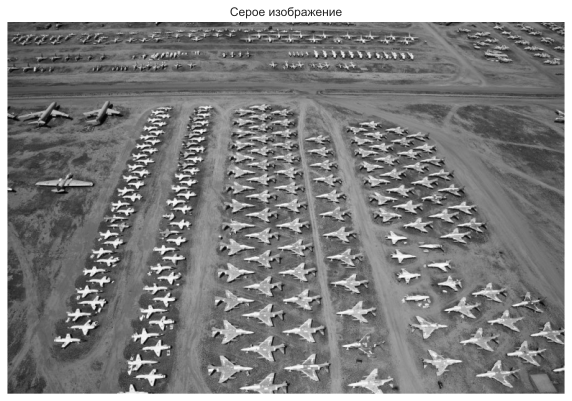

In [63]:
image = cv.imread("pictures/1.jpg")

gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.title("Серое изображение")
plt.show()

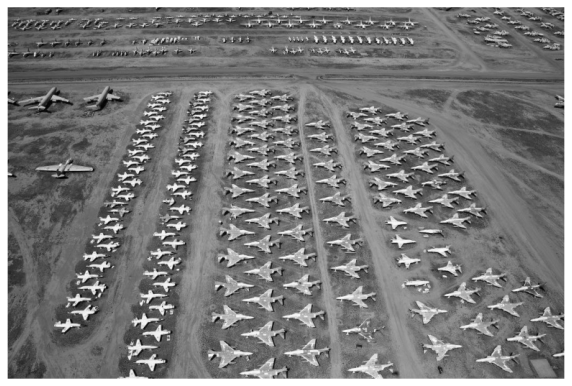

In [62]:
i = plt.imread("C:/Users/valer/Desktop/mmp_courses/ОиРИ/лаб. 1/pictures/1.jpg")
i = cv.cvtColor(i, cv.COLOR_RGB2GRAY)
i = cv.cvtColor(i, cv.COLOR_GRAY2RGB)
plt.imshow(i)
plt.axis("off")
plt.show()

In [47]:
import os
os.path.exists("C:/Users/valer/Desktop/mmp_courses/ОиРИ/лаб. 1/pictures/1.jpg")

True

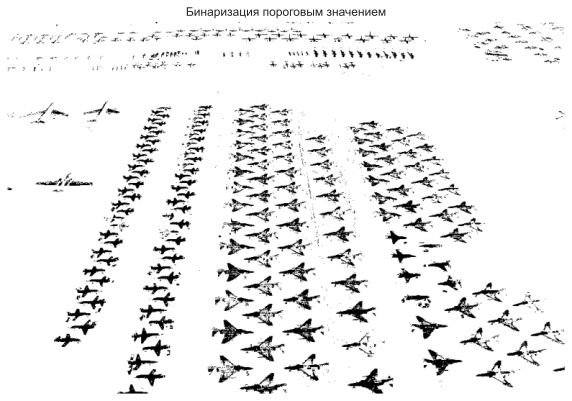

In [9]:
thresh = 80

_, blackAndWhiteImage = cv.threshold(255 - gray_image, thresh, 255,
                                              cv.THRESH_BINARY)

plt.imshow(blackAndWhiteImage, cmap="gray")
plt.axis("off")
plt.title("Бинаризация пороговым значением")
plt.show()

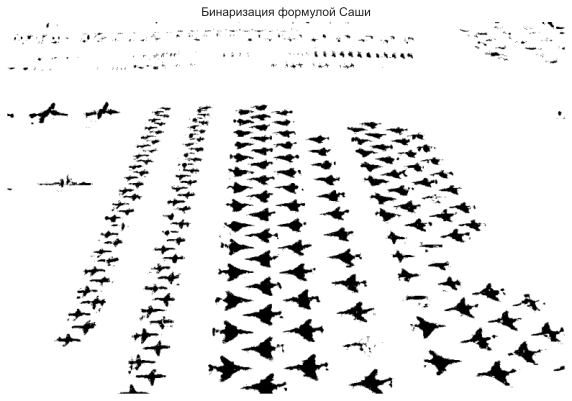

In [10]:
g, b, r = [image[:, :, i] for i in range(3)]
brightness = 0.299 * r + 0.587 * g + 0.114 * b
mask = (brightness > 200) & (r < b) | (r + 10 < b)

blackAndWhiteImage[:, :] = 255
blackAndWhiteImage[mask] = 0 

plt.imshow(blackAndWhiteImage, cmap="gray")
plt.axis("off")
plt.title("Бинаризация формулой Саши")
plt.show()

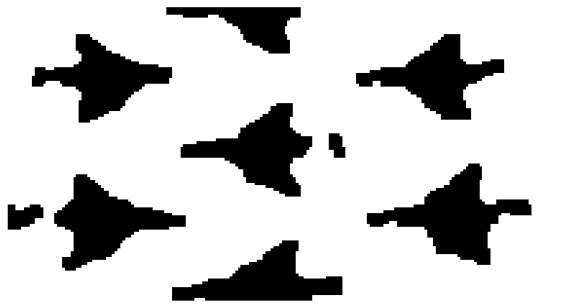

In [25]:
kernel_opening = np.ones((3, 3), np.uint8)
kernel_closing = np.ones((4, 4), np.uint8)
kernel_dilation = np.ones((5, 5), np.uint8)

blackAndWhiteImage_ = blackAndWhiteImage.copy()

# opening
blackAndWhiteImage_ = cv.morphologyEx(blackAndWhiteImage_, cv.MORPH_OPEN, kernel_opening)

# closing
blackAndWhiteImage_ = cv.morphologyEx(blackAndWhiteImage_, cv.MORPH_CLOSE, kernel_closing)

# dilation 
#blackAndWhiteImage_ = cv.dilate(blackAndWhiteImage_, kernel_dilation, iterations = 1)

plt.imshow(blackAndWhiteImage_, cmap="gray")
plt.axis("off")
plt.show()

In [13]:
img_name = "1"

img = Image.fromarray(blackAndWhiteImage).convert("1")
img.save(f"etc/{img_name}.bmp")


subprocess.check_call([
    "etc/MedialRep_Server_v2.exe",
    f"etc/{img_name}.bmp",
    "2", # параметр стрижки скелета - минимальная длина ребра в пикселях (default=2)
    "70" # минимальная площадь связной компоненты (default=10)
])

with open(f"etc/{img_name}.txt", "r") as f:
    n_figures = int(f.readline().split()[3])
    n_outlines = int(f.readline().split()[3])

    for fig in range(n_figures):
        f.readline()  # skip line "Figure {fig}"
        n_holes = int(f.readline().split()[3])
        f.readline()

        for j in range(n_holes + 1):
            t = f.readline().split()[0]  # polygon type
            vert_num = int(f.readline().split()[3])

            if t == "External":
                coords = np.zeros((vert_num + 1, 2))
                for i in range(vert_num):
                    coords[i, 0], coords[i, 1] = map(int, f.readline().split()[1:])

                coords[-1] = coords[0]
                plt.plot(coords[:, 0], coords[:, 1], linewidth=1)
            else:
                # skip internal polygons
                for _ in range(vert_num):
                    f.readline()

        f.readline()  # skip line "Skeleton of figure {fig}"
        n_nodes_sk = int(f.readline().split()[3])
        for _ in range(n_nodes_sk):
            f.readline() # skip skeleton nodes

        n_edges = int(f.readline().split()[3])
        f.readline()  # skip line "Number of controls {...}"
        for _ in range(n_edges):
            f.readline() # skip skeleton edges

plt.axis("off")
plt.savefig(f"etc/{img_name}.jpg")
plt.close()
print(n_figures) # число самолетов на изображении

164


164


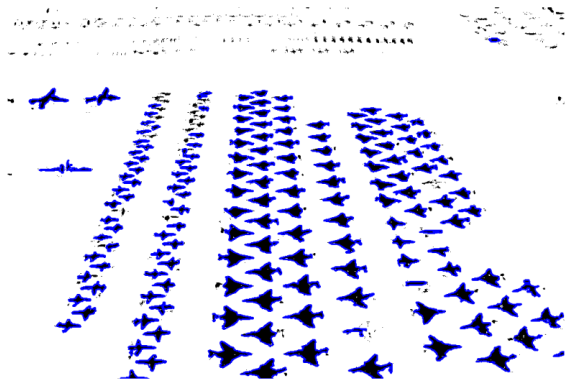

In [33]:
img_name = "1"

img = Image.fromarray(blackAndWhiteImage).convert("1")
img.save(f"etc/{img_name}.bmp")

blackAndWhiteImage_with_c = blackAndWhiteImage.copy()
blackAndWhiteImage_with_c = cv.cvtColor(blackAndWhiteImage_with_c, cv.COLOR_GRAY2RGB)
max_y = blackAndWhiteImage_with_c.shape[0]


subprocess.check_call([
    "etc/MedialRep_Server_v2.exe",
    f"etc/{img_name}.bmp",
    "2", # параметр стрижки скелета - минимальная длина ребра в пикселях (default=2)
    "70" # минимальная площадь связной компоненты (default=10)
])

with open(f"etc/{img_name}.txt", "r") as f:
    n_figures = int(f.readline().split()[3])
    n_outlines = int(f.readline().split()[3])

    for fig in range(n_figures):
        f.readline()  # skip line "Figure {fig}"
        n_holes = int(f.readline().split()[3])
        f.readline()

        for j in range(n_holes + 1):
            t = f.readline().split()[0]  # polygon type
            vert_num = int(f.readline().split()[3])

            if t == "External":
                coords = np.zeros((vert_num, 2))
                for i in range(vert_num):
                    x, y = map(int, f.readline().split()[1:])
                    coords[i, 0], coords[i, 1] = x, max_y - y
                
                #coords[-1] = coords[0]
                #plt.plot(coords[:, 0], coords[:, 1], linewidth=1)
                blackAndWhiteImage_with_c = cv.polylines(
                    blackAndWhiteImage_with_c,
                    [coords.reshape((-1, 1, 2)).astype(np.int32)],
                    isClosed=False,
                    color=(0, 0, 255),
                    thickness=2
                )
            else:
                # skip internal polygons
                for _ in range(vert_num):
                    f.readline()

        f.readline()  # skip line "Skeleton of figure {fig}"
        n_nodes_sk = int(f.readline().split()[3])
        for _ in range(n_nodes_sk):
            f.readline() # skip skeleton nodes

        n_edges = int(f.readline().split()[3])
        f.readline()  # skip line "Number of controls {...}"
        for _ in range(n_edges):
            f.readline() # skip skeleton edges

#plt.axis("off")
#plt.savefig(f"etc/{img_name}.jpg")
#plt.close()
print(n_figures) # число самолетов на изображении
plt.imshow(blackAndWhiteImage_with_c)
plt.axis("off")
plt.show()

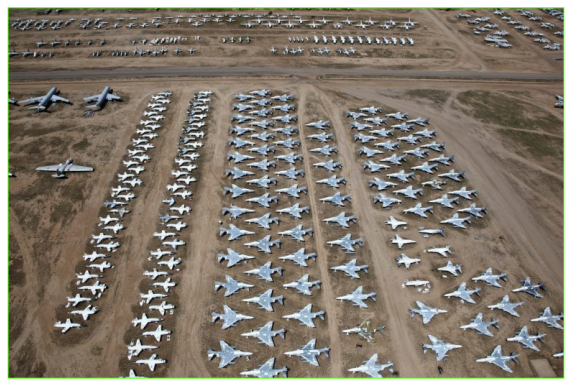

In [ ]:
contours, _ = cv.findContours(255 - blackAndWhiteImage, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 100]

cv.drawContours(image, contours, -1, (0, 255, 75), 2)

plt.imshow(image[:, :, ::-1])
plt.axis("off")
plt.show()